<a href="https://colab.research.google.com/github/Badr380/Python-Analysis/blob/main/Climate%20Change%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px

In [ ]:
Climate_change_in_Africa = pd.read_csv('/content/drive/MyDrive/Data Science Bootcamp Course/data visualization with python/Africa_climate_change.csv')

In [ ]:
Climate_change_in_Africa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464815 entries, 0 to 464814
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   DATE     464815 non-null  object 
 1   PRCP     177575 non-null  float64
 2   TAVG     458439 non-null  float64
 3   TMAX     363901 non-null  float64
 4   TMIN     332757 non-null  float64
 5   COUNTRY  464815 non-null  object 
dtypes: float64(4), object(2)
memory usage: 21.3+ MB


In [ ]:
Climate_change_in_Africa.head(10)

DATE  PRCP  TAVG  TMAX  TMIN   COUNTRY
0  19800101 000000   NaN  54.0  61.0  43.0   Tunisia
1  19800101 000000   NaN  49.0  55.0  41.0   Tunisia
2  19800101 000000   0.0  72.0  86.0  59.0  Cameroon
3  19800101 000000   NaN  50.0  55.0  43.0   Tunisia
4  19800101 000000   NaN  75.0  91.0   NaN  Cameroon
5  19800101 000000   NaN  52.0  61.0  45.0   Tunisia
6  19800101 000000   0.0  76.0  97.0  59.0   Senegal
7  19800101 000000   0.0  74.0  95.0  59.0   Senegal
8  19800101 000000   0.0  78.0  93.0  63.0   Senegal
9  19800101 000000   0.0  76.0  91.0  59.0   Senegal

In [ ]:
(Climate_change_in_Africa.isnull()).sum()

DATE            0
PRCP       287240
TAVG         6376
TMAX       100914
TMIN       132058
COUNTRY         0
dtype: int64

In [ ]:
New_Climate_change_in_Africa_df = Climate_change_in_Africa.drop("PRCP", axis='columns')

In [ ]:
(New_Climate_change_in_Africa_df.isnull()).sum()

DATE            0
TAVG         6376
TMAX       100914
TMIN       132058
COUNTRY         0
dtype: int64

In [ ]:
New_Climate_change_in_Africa_df['DATE'] = pd.to_datetime(New_Climate_change_in_Africa_df['DATE'])

In [ ]:
New_Climate_change_in_Africa_df.head(10)

DATE  TAVG  TMAX  TMIN   COUNTRY
0 1980-01-01  54.0  61.0  43.0   Tunisia
1 1980-01-01  49.0  55.0  41.0   Tunisia
2 1980-01-01  72.0  86.0  59.0  Cameroon
3 1980-01-01  50.0  55.0  43.0   Tunisia
4 1980-01-01  75.0  91.0   NaN  Cameroon
5 1980-01-01  52.0  61.0  45.0   Tunisia
6 1980-01-01  76.0  97.0  59.0   Senegal
7 1980-01-01  74.0  95.0  59.0   Senegal
8 1980-01-01  78.0  93.0  63.0   Senegal
9 1980-01-01  76.0  91.0  59.0   Senegal

In [ ]:
New_Climate_change_in_Africa_df['month'] = New_Climate_change_in_Africa_df['DATE'].dt.month
New_Climate_change_in_Africa_df['year'] = New_Climate_change_in_Africa_df['DATE'].dt.year

In [ ]:
New_Climate_change_in_Africa_df.head(10)

DATE  TAVG  TMAX  TMIN   COUNTRY  month  year
0 1980-01-01  54.0  61.0  43.0   Tunisia      1  1980
1 1980-01-01  49.0  55.0  41.0   Tunisia      1  1980
2 1980-01-01  72.0  86.0  59.0  Cameroon      1  1980
3 1980-01-01  50.0  55.0  43.0   Tunisia      1  1980
4 1980-01-01  75.0  91.0   NaN  Cameroon      1  1980
5 1980-01-01  52.0  61.0  45.0   Tunisia      1  1980
6 1980-01-01  76.0  97.0  59.0   Senegal      1  1980
7 1980-01-01  74.0  95.0  59.0   Senegal      1  1980
8 1980-01-01  78.0  93.0  63.0   Senegal      1  1980
9 1980-01-01  76.0  91.0  59.0   Senegal      1  1980

In [ ]:
Monthly_means = New_Climate_change_in_Africa_df.groupby('month')['TMIN'].mean()

In [ ]:
Approximte_Monthly_means = Monthly_means.round()
Approximte_Monthly_means

month
1     54.0
2     56.0
3     60.0
4     64.0
5     69.0
6     73.0
7     74.0
8     75.0
9     73.0
10    69.0
11    62.0
12    56.0
Name: TMIN, dtype: float64

In [ ]:
Merged_DF = New_Climate_change_in_Africa_df.merge(Approximte_Monthly_means,how='left',on='month')

In [ ]:
Merged_DF.head(10)

DATE  TAVG  TMAX  TMIN_x   COUNTRY  month  year  TMIN_y
0 1980-01-01  54.0  61.0    43.0   Tunisia      1  1980    54.0
1 1980-01-01  49.0  55.0    41.0   Tunisia      1  1980    54.0
2 1980-01-01  72.0  86.0    59.0  Cameroon      1  1980    54.0
3 1980-01-01  50.0  55.0    43.0   Tunisia      1  1980    54.0
4 1980-01-01  75.0  91.0     NaN  Cameroon      1  1980    54.0
5 1980-01-01  52.0  61.0    45.0   Tunisia      1  1980    54.0
6 1980-01-01  76.0  97.0    59.0   Senegal      1  1980    54.0
7 1980-01-01  74.0  95.0    59.0   Senegal      1  1980    54.0
8 1980-01-01  78.0  93.0    63.0   Senegal      1  1980    54.0
9 1980-01-01  76.0  91.0    59.0   Senegal      1  1980    54.0

In [ ]:
Merged_DF['TMIN_x'].fillna(Merged_DF['TMIN_y'], inplace=True)

In [ ]:
Merged_DF.drop('TMIN_y',axis='columns')

DATE  TAVG  TMAX  TMIN_x   COUNTRY  month  year
0      1980-01-01  54.0  61.0    43.0   Tunisia      1  1980
1      1980-01-01  49.0  55.0    41.0   Tunisia      1  1980
2      1980-01-01  72.0  86.0    59.0  Cameroon      1  1980
3      1980-01-01  50.0  55.0    43.0   Tunisia      1  1980
4      1980-01-01  75.0  91.0    54.0  Cameroon      1  1980
...           ...   ...   ...     ...       ...    ...   ...
464810 2023-08-23  85.0  89.0    75.0   Senegal      8  2023
464811 2023-08-23  80.0  90.0    72.0     Egypt      8  2023
464812 2023-08-23  87.0   NaN    73.0     Egypt      8  2023
464813 2023-08-23  82.0  94.0    75.0   Senegal      8  2023
464814 2023-08-23  83.0   NaN    75.0  Cameroon      8  2023

[464815 rows x 7 columns]

In [ ]:
Merged_DF.drop('TMIN_y',axis='columns')

DATE  TAVG  TMAX  TMIN_x   COUNTRY  month  year
0      1980-01-01  54.0  61.0    43.0   Tunisia      1  1980
1      1980-01-01  49.0  55.0    41.0   Tunisia      1  1980
2      1980-01-01  72.0  86.0    59.0  Cameroon      1  1980
3      1980-01-01  50.0  55.0    43.0   Tunisia      1  1980
4      1980-01-01  75.0  91.0    54.0  Cameroon      1  1980
...           ...   ...   ...     ...       ...    ...   ...
464810 2023-08-23  85.0  89.0    75.0   Senegal      8  2023
464811 2023-08-23  80.0  90.0    72.0     Egypt      8  2023
464812 2023-08-23  87.0   NaN    73.0     Egypt      8  2023
464813 2023-08-23  82.0  94.0    75.0   Senegal      8  2023
464814 2023-08-23  83.0   NaN    75.0  Cameroon      8  2023

[464815 rows x 7 columns]

In [ ]:
Merged_DF.drop('TMIN_y',axis='columns')

DATE  TAVG  TMAX  TMIN_x   COUNTRY  month  year
0      1980-01-01  54.0  61.0    43.0   Tunisia      1  1980
1      1980-01-01  49.0  55.0    41.0   Tunisia      1  1980
2      1980-01-01  72.0  86.0    59.0  Cameroon      1  1980
3      1980-01-01  50.0  55.0    43.0   Tunisia      1  1980
4      1980-01-01  75.0  91.0    54.0  Cameroon      1  1980
...           ...   ...   ...     ...       ...    ...   ...
464810 2023-08-23  85.0  89.0    75.0   Senegal      8  2023
464811 2023-08-23  80.0  90.0    72.0     Egypt      8  2023
464812 2023-08-23  87.0   NaN    73.0     Egypt      8  2023
464813 2023-08-23  82.0  94.0    75.0   Senegal      8  2023
464814 2023-08-23  83.0   NaN    75.0  Cameroon      8  2023

[464815 rows x 7 columns]

In [ ]:
Monthly_means2 = New_Climate_change_in_Africa_df.groupby('month')['TMAX'].mean()

In [ ]:
Approximte_Monthly_means2 = Monthly_means2.round()
Approximte_Monthly_means2

month
1     79.0
2     82.0
3     86.0
4     90.0
5     94.0
6     95.0
7     95.0
8     94.0
9     92.0
10    91.0
11    86.0
12    80.0
Name: TMAX, dtype: float64

In [ ]:
Merged_DF2 = Merged_DF.merge(Approximte_Monthly_means2,how='left',on='month')
Merged_DF2.head(15)

DATE  TAVG  TMAX_x  TMIN_x   COUNTRY  month  year  TMIN_y  TMAX_y
0  1980-01-01  54.0    61.0    43.0   Tunisia      1  1980    54.0    79.0
1  1980-01-01  49.0    55.0    41.0   Tunisia      1  1980    54.0    79.0
2  1980-01-01  72.0    86.0    59.0  Cameroon      1  1980    54.0    79.0
3  1980-01-01  50.0    55.0    43.0   Tunisia      1  1980    54.0    79.0
4  1980-01-01  75.0    91.0    54.0  Cameroon      1  1980    54.0    79.0
5  1980-01-01  52.0    61.0    45.0   Tunisia      1  1980    54.0    79.0
6  1980-01-01  76.0    97.0    59.0   Senegal      1  1980    54.0    79.0
7  1980-01-01  74.0    95.0    59.0   Senegal      1  1980    54.0    79.0
8  1980-01-01  78.0    93.0    63.0   Senegal      1  1980    54.0    79.0
9  1980-01-01  76.0    91.0    59.0   Senegal      1  1980    54.0    79.0
10 1980-01-01  56.0    72.0    45.0     Egypt      1  1980    54.0    79.0
11 1980-01-01  84.0    99.0    54.0   Senegal      1  1980    54.0    79.0
12 1980-01-01  54.0    68.0    43.0     Egypt      1  1980    54.0    79.0
13 1980-01-01  74.0    81.0    66.0   Senegal      1  1980    54.0    79.0
14 1980-01-01  86.0    97.0    54.0   Senegal      1  1980    54.0    79.0

In [ ]:
Merged_DF2['TMAX_x'].fillna(Merged_DF2['TMAX_y'], inplace=True)

In [ ]:
Merged_DF2.drop('TMIN_y',axis='columns',inplace=True)

In [ ]:
Merged_DF2.drop('TMAX_y',axis='columns',inplace=True)

In [ ]:
(Merged_DF2.isnull()).sum()

DATE          0
TAVG       6376
TMAX_x        0
TMIN_x        0
COUNTRY       0
month         0
year          0
dtype: int64

In [ ]:
Merged_DF2['TAVG_y']= round((Merged_DF2['TMAX_x']+Merged_DF2['TMIN_x'])/2)
Merged_DF2.head(10)

DATE  TAVG  TMAX_x  TMIN_x   COUNTRY  month  year  TAVG_y
0 1980-01-01  54.0    61.0    43.0   Tunisia      1  1980    52.0
1 1980-01-01  49.0    55.0    41.0   Tunisia      1  1980    48.0
2 1980-01-01  72.0    86.0    59.0  Cameroon      1  1980    72.0
3 1980-01-01  50.0    55.0    43.0   Tunisia      1  1980    49.0
4 1980-01-01  75.0    91.0    54.0  Cameroon      1  1980    72.0
5 1980-01-01  52.0    61.0    45.0   Tunisia      1  1980    53.0
6 1980-01-01  76.0    97.0    59.0   Senegal      1  1980    78.0
7 1980-01-01  74.0    95.0    59.0   Senegal      1  1980    77.0
8 1980-01-01  78.0    93.0    63.0   Senegal      1  1980    78.0
9 1980-01-01  76.0    91.0    59.0   Senegal      1  1980    75.0

In [ ]:
Merged_DF2['TAVG'].fillna(Merged_DF2['TAVG_y'], inplace=True)

In [ ]:
(Merged_DF2.isnull()).sum()

DATE       0
TAVG       0
TMAX_x     0
TMIN_x     0
COUNTRY    0
month      0
year       0
TAVG_y     0
dtype: int64

In [ ]:
Merged_DF2.drop('TAVG_y',axis='columns',inplace=True)

In [ ]:
Merged_DF2.head(10)

DATE  TAVG  TMAX_x  TMIN_x   COUNTRY  month  year
0 1980-01-01  54.0    61.0    43.0   Tunisia      1  1980
1 1980-01-01  49.0    55.0    41.0   Tunisia      1  1980
2 1980-01-01  72.0    86.0    59.0  Cameroon      1  1980
3 1980-01-01  50.0    55.0    43.0   Tunisia      1  1980
4 1980-01-01  75.0    91.0    54.0  Cameroon      1  1980
5 1980-01-01  52.0    61.0    45.0   Tunisia      1  1980
6 1980-01-01  76.0    97.0    59.0   Senegal      1  1980
7 1980-01-01  74.0    95.0    59.0   Senegal      1  1980
8 1980-01-01  78.0    93.0    63.0   Senegal      1  1980
9 1980-01-01  76.0    91.0    59.0   Senegal      1  1980

In [ ]:
Merged_DF2_c=Merged_DF2[(Merged_DF2['COUNTRY'] == 'Tunisia') | (Merged_DF2['COUNTRY'] == 'Cameroon')]

In [ ]:
fig1 = px.line(Merged_DF2_c, x='DATE', y='TAVG', title='AVG Temprature for Tunisia & Cameroon', color = 'COUNTRY')

In [ ]:
fig1.show()

Data not clear to visulize and elaborte therefore the next codes will visulize better and will find a clear elaboration for the result after

In [ ]:
Merged_DF2_c_y=Merged_DF2[(((Merged_DF2['COUNTRY'] == 'Tunisia') | (Merged_DF2['COUNTRY'] == 'Cameroon')) & ((Merged_DF2['year'] > 1980) & ((Merged_DF2['year'] <= 2005))))]

In [ ]:
fig2 = px.line(Merged_DF2_c_y, x='DATE', y='TAVG', title='AVG Temprature for Tunisia & Cameroon from 1980 to 2005',color='COUNTRY')
fig2.show()

In [ ]:
Merged_DF3 = Merged_DF2.groupby(['COUNTRY','year'])['TAVG'].mean().reset_index()
Merged_DF3.head(10)

COUNTRY  year       TAVG
0  Angola  1980  76.934959
1  Angola  1981  76.544081
2  Angola  1982  76.779255
3  Angola  1983  77.979104
4  Angola  1984  76.956164
5  Angola  1985  75.707395
6  Angola  1986  71.371901
7  Angola  1991  83.166667
8  Angola  1994  71.714286
9  Angola  2001  76.098684

In [ ]:
Merged_DF3_c = Merged_DF3[(Merged_DF3['COUNTRY'] == 'Tunisia') | (Merged_DF3['COUNTRY'] == 'Cameroon')]

In [ ]:
fig3 = px.line(Merged_DF3_c, x='year', y='TAVG', title='AVG Temprature for Tunisia & Cameroon', color = 'COUNTRY')
fig3.show()

- We can see that the degree in Cameroon is higher than Tunisia around 15 degree hotter
- We can also observe that there's a high flictuations for in Cameroon at 1991 and 1992. In addition from 2003 the degree got increased around 5 degrees
- On the other hand Tunisia temp where almost the same during the years except from 1999 till 2003

In [ ]:
Merged_DF4_histogram = Merged_DF2[(Merged_DF2['COUNTRY'] == 'Senegal') & ((Merged_DF2['year'] >= 1980) & ((Merged_DF2['year'] < 2000)))]
Merged_DF5_histogram = Merged_DF2[(Merged_DF2['COUNTRY'] == 'Senegal') & ((Merged_DF2['year'] >= 2000) & ((Merged_DF2['year'] <= 2023)))]

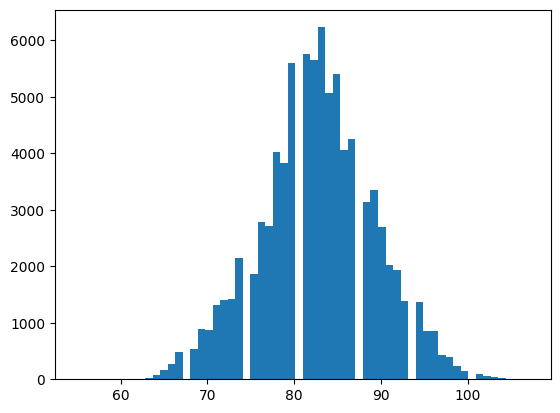

In [ ]:
fig4 = plt.hist(Merged_DF4_histogram['TAVG'],bins=60)

In [ ]:
from scipy.stats import norm

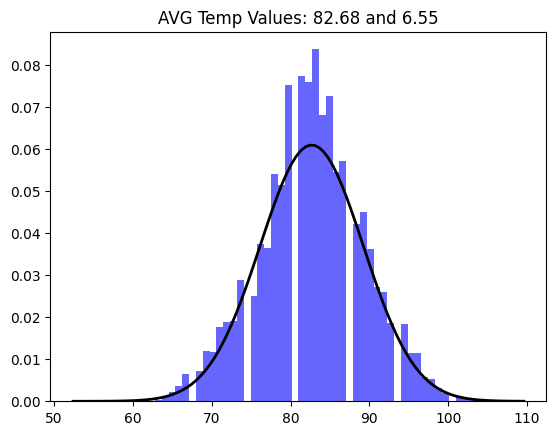

In [ ]:
mu, std = norm.fit(Merged_DF4_histogram['TAVG'])

# Plot the histogram.
plt.hist(Merged_DF4_histogram['TAVG'], bins=60, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "AVG Temp Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)

plt.show()

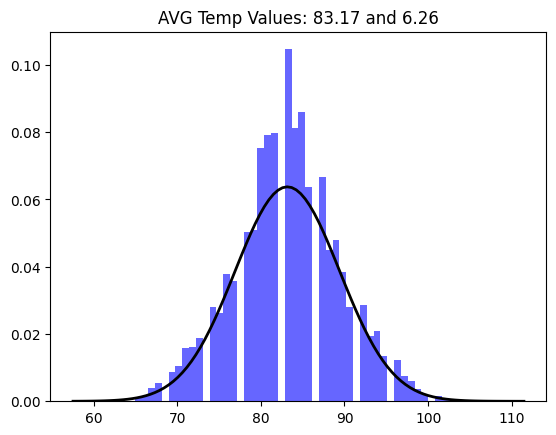

In [ ]:
mu, std = norm.fit(Merged_DF5_histogram['TAVG'])

# Plot the histogram.
plt.hist(Merged_DF5_histogram['TAVG'], bins=60, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "AVG Temp Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)

plt.show()

Text(0.5, 1.0, 'AVG Temp from 2000 to 2023')

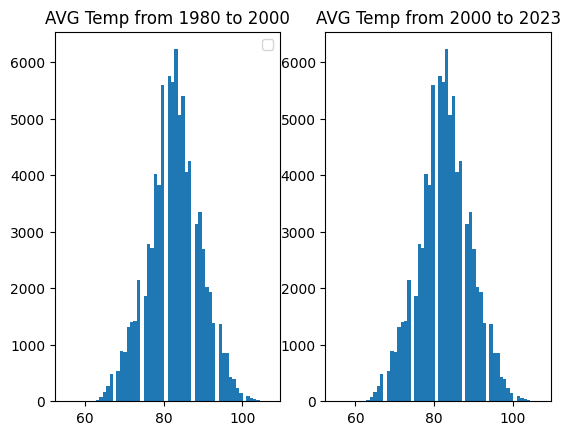

In [ ]:
fig, ((ax0, ax1)) = plt.subplots(nrows=1, ncols=2)

ax0.hist(Merged_DF4_histogram['TAVG'], bins=60)
ax0.legend(prop={'size': 10})
ax0.set_title('AVG Temp from 1980 to 2000')

ax1.hist(Merged_DF4_histogram['TAVG'], bins=60)
ax1.set_title('AVG Temp from 2000 to 2023')

- The AVG temp in Sengal almost the same in the two periods with the same frequency

In [ ]:
fig5 = px.line(Merged_DF3, x='year', y='TAVG', title='AVG Temprature per Country', color = 'COUNTRY')
fig5.show()

In [ ]:
Merged_DF3_one_year = Merged_DF3[Merged_DF3['year']==2000]

In [ ]:
fig5 = px.bar(Merged_DF3_one_year, x='COUNTRY', y='TAVG', title='AVG Temprature per Country in year', color = 'COUNTRY')
fig5.show()

- My question is what is the highest degree through years in Countries

In [ ]:
Merged_DF6 = Merged_DF2.groupby(['COUNTRY','year'])['TMAX_x'].mean().reset_index()
Merged_DF6.head(10)

COUNTRY  year     TMAX_x
0  Angola  1980  88.639566
1  Angola  1981  88.130982
2  Angola  1982  88.470745
3  Angola  1983  89.602985
4  Angola  1984  88.698630
5  Angola  1985  87.819936
6  Angola  1986  84.289256
7  Angola  1991  93.416667
8  Angola  1994  86.428571
9  Angola  2001  88.256579

In [ ]:
fig5 = px.line(Merged_DF6, x='year', y='TMAX_x', title='MAX Temprature per Country through years', color = 'COUNTRY')
fig5.show()